**IMPORTING ALL THE REQUIRED LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
import tensorflow as tlf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense


**GETTING THE DATASET**

In [2]:
df_amazon=pd.read_csv('HistoricalData_AMZN.csv',index_col='Date',parse_dates=True)

In [3]:
df_amazon.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2021-06-09,$3281.15,2455530,$3272.87,$3297.58,$3270.7
2021-06-08,$3264.11,3416730,$3222.61,$3279.5321,$3218.01
2021-06-07,$3198.01,2215756,$3197.33,$3208,$3172.2
2021-06-04,$3206.22,2249749,$3212,$3221,$3198.81
2021-06-03,$3187.01,2398293,$3204.23,$3214.435,$3184.03


In [4]:
df_amazon.columns

Index(['Close/Last', 'Volume', 'Open', 'High', 'Low'], dtype='object')

In [5]:
df_amazon.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2021-06-09,$3281.15,2455530,$3272.87,$3297.58,$3270.7
2021-06-08,$3264.11,3416730,$3222.61,$3279.5321,$3218.01
2021-06-07,$3198.01,2215756,$3197.33,$3208,$3172.2
2021-06-04,$3206.22,2249749,$3212,$3221,$3198.81
2021-06-03,$3187.01,2398293,$3204.23,$3214.435,$3184.03


**CLEANING THE DATASET**

In [6]:
df_amazon['Close/Last'] = df_amazon['Close/Last'].str.replace('$', '')
df_amazon['Open'] = df_amazon['Open'].str.replace('$', '')
df_amazon['High'] = df_amazon['High'].str.replace('$', '')
df_amazon['Low'] = df_amazon['Low'].str.replace('$', '')

In [7]:
df_amazon.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2021-06-09,3281.15,2455530,3272.87,3297.58,3270.7
2021-06-08,3264.11,3416730,3222.61,3279.5321,3218.01
2021-06-07,3198.01,2215756,3197.33,3208,3172.2
2021-06-04,3206.22,2249749,3212,3221,3198.81
2021-06-03,3187.01,2398293,3204.23,3214.435,3184.03


In [8]:
df_amazon.tail()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2011-06-16,183.65,6025431,185.74,187,181.59
2011-06-15,185.98,6310918,188.04,192.45,185.3
2011-06-14,189.96,3952911,188.99,190.72,187.07
2011-06-13,186.29,3867735,186.81,189.31,184.86
2011-06-10,186.53,3753267,189.25,190.77,186.28


In [9]:
col_name=['Close/Last','Open','High','Low']
for i in range(0,4):
 df_amazon[col_name[i]] = pd.to_numeric(df_amazon[col_name[i]])

In [10]:
df_amazon['High'].dtype

dtype('float64')

In [11]:
df_amazon.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2021-06-09 to 2011-06-10
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Close/Last  2516 non-null   float64
 1   Volume      2516 non-null   int64  
 2   Open        2516 non-null   float64
 3   High        2516 non-null   float64
 4   Low         2516 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 117.9 KB


In [12]:
df_amazon.count()

Close/Last    2516
Volume        2516
Open          2516
High          2516
Low           2516
dtype: int64

In [13]:
df_amazon.isnull().sum() #no null values in the data set

Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64

In [14]:
df_amazon.duplicated() #no duplicate values

Date
2021-06-09    False
2021-06-08    False
2021-06-07    False
2021-06-04    False
2021-06-03    False
              ...  
2011-06-16    False
2011-06-15    False
2011-06-14    False
2011-06-13    False
2011-06-10    False
Length: 2516, dtype: bool

In [15]:
df_amazon.corr()

,Close/Last,Volume,Open,High,Low
Close/Last,1.000000,0.058536,0.999710,0.999857,0.999869
Volume,0.058536,1.000000,0.059707,0.063775,0.053753
Open,0.999710,0.059707,1.000000,0.999881,0.999835
High,0.999857,0.063775,0.999881,1.000000,0.999801
Low,0.999869,0.053753,0.999835,0.999801,1.000000


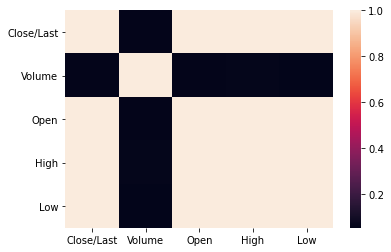

In [16]:
sns.heatmap(df_amazon.corr())

**VISUALISING THROUGH DIFFERENT PLOTS**

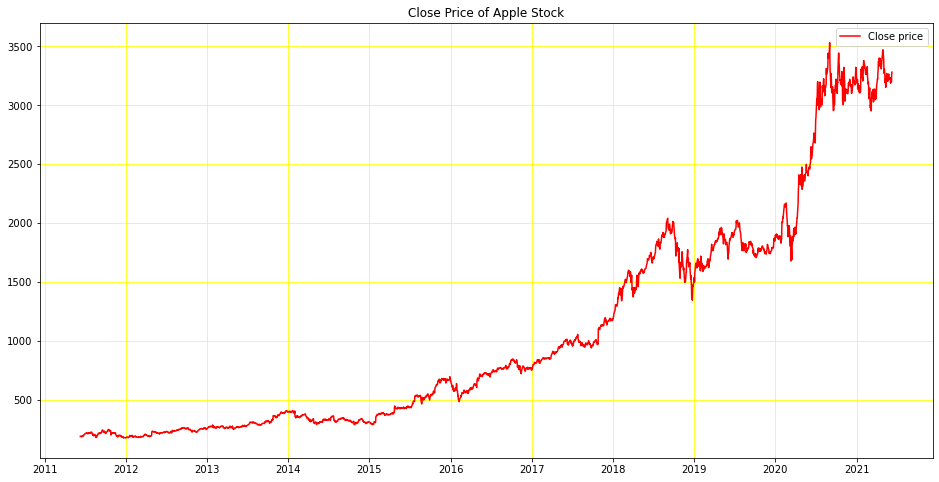

In [17]:
plt.figure(figsize=(16,8))
plt.title("Close Price of Apple Stock")
plt.plot(df_amazon['Close/Last'],c='red',label='Close price')
plt.grid(c='yellow')
plt.legend()
plt.show()

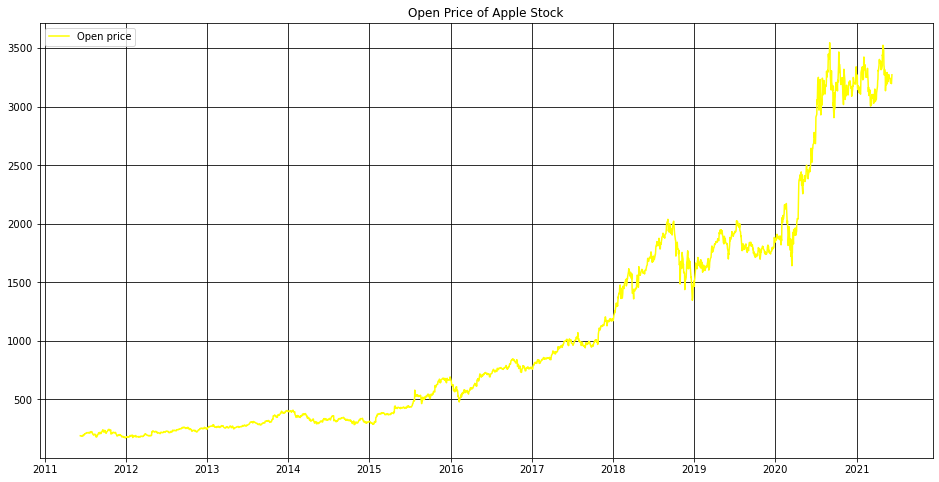

In [18]:
plt.figure(figsize=(16,8))
plt.title("Open Price of Apple Stock")
plt.plot(df_amazon['Open'],c='yellow',label='Open price')
plt.grid(c='black')
plt.legend()
plt.show()

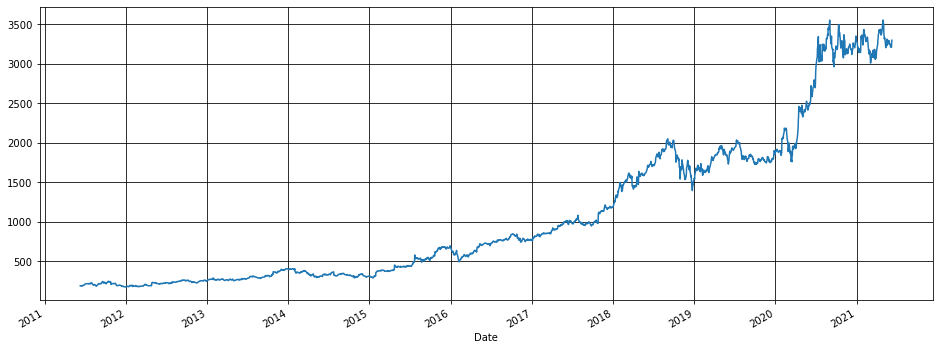

In [19]:
df_amazon['High'].plot(figsize=(16,6))
plt.grid(c='black')

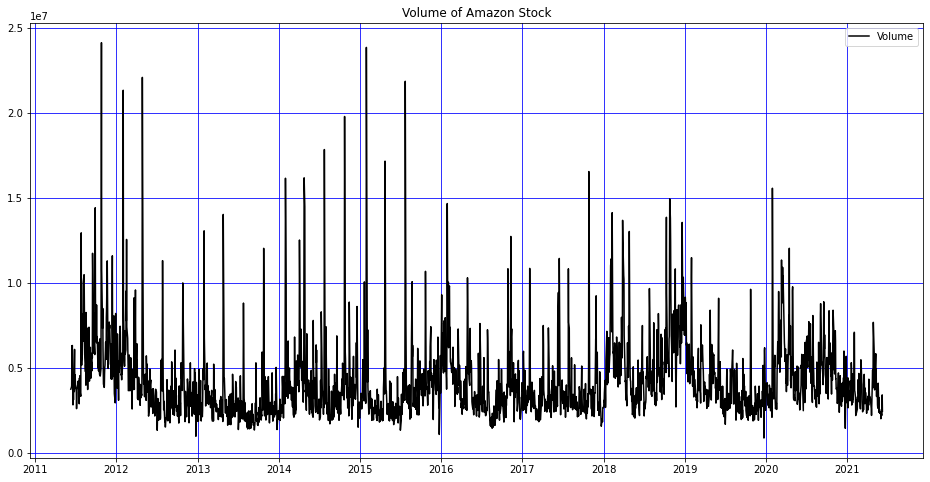

In [20]:

plt.figure(figsize=(16,8))
plt.title("Volume of Amazon Stock")
plt.plot(df_amazon['Volume'],c='Black',label='Volume')
plt.grid(c='blue')
plt.legend()
plt.show()

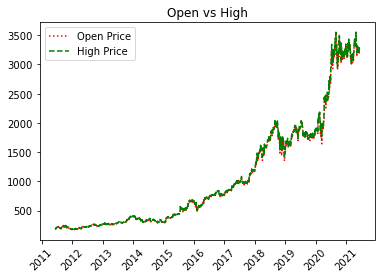

In [21]:
c=df_amazon.Open
h=df_amazon.High
plt.plot(c,c='red',label='Open Price',linestyle='dotted')
plt.plot(h,c='green',label='High Price',linestyle='dashed')
plt.title('Open vs High')
plt.legend()
plt.xticks(rotation=45)
plt.show()

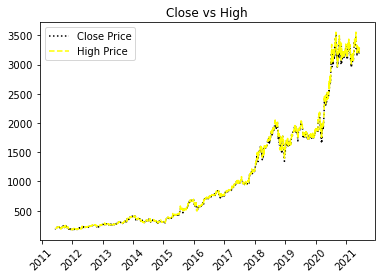

In [22]:
l=df_amazon['Close/Last']
h=df_amazon.High
plt.plot(l,c='black',label='Close Price',linestyle='dotted')
plt.plot(h,c='yellow',label='High Price',linestyle='dashed')
plt.title('Close vs High')
plt.legend()
plt.xticks(rotation=45)
plt.show()

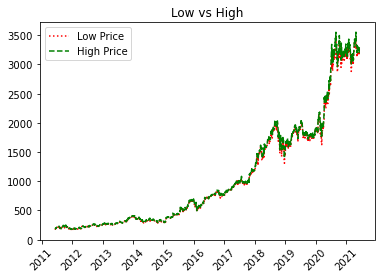

In [23]:
lo=df_amazon['Low']
h=df_amazon.High
plt.plot(lo,c='red',label='Low Price',linestyle='dotted')
plt.plot(h,c='green',label='High Price',linestyle='dashed')
plt.title('Low vs High')
plt.legend()
plt.xticks(rotation=45)
plt.show()

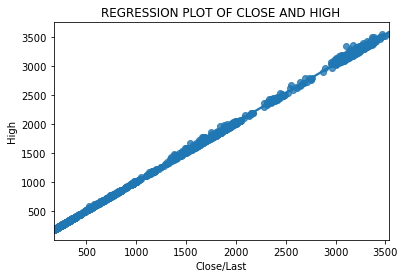

            Close/Last    Volume      Open      High       Low
Close/Last    1.000000  0.058536  0.999710  0.999857  0.999869
Volume        0.058536  1.000000  0.059707  0.063775  0.053753
Open          0.999710  0.059707  1.000000  0.999881  0.999835
High          0.999857  0.063775  0.999881  1.000000  0.999801
Low           0.999869  0.053753  0.999835  0.999801  1.000000


In [24]:
sns.regplot(l,h)
plt.title("REGRESSION PLOT OF CLOSE AND HIGH")
plt.show()
print(df_amazon.corr())

In [25]:
data=df_amazon['Close/Last']


In [26]:
data.shape

(2516,)

In [27]:
dataset=data.values.reshape(-1,1)
dataset

array([[3281.15],
       [3264.11],
       [3198.01],
       ...,
       [ 189.96],
       [ 186.29],
       [ 186.53]])

In [28]:
training_data_len=math.ceil(len(dataset)*.8)
training_data_len

2013

**Scaling the Data**

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:


scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.92546935],
       [0.92039543],
       [0.90071315],
       ...,
       [0.00502032],
       [0.00392752],
       [0.00399899]])

In [31]:
#Creating the training dataset
#Creating the scaled training data set

train_data=scaled_data[0:training_data_len,:]


#splitting the train data into x_train and y_train dataset
x_train=[]
y_train=[]

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()

[array([0.92546935, 0.92039543, 0.90071315, 0.9031578 , 0.89743773,
       0.91142674, 0.90685902, 0.90817515, 0.91027141, 0.92070809,
       0.91888874, 0.91470216, 0.90222282, 0.91550315, 0.91077464,
       0.91091756, 0.9222654 , 0.90812453, 0.8898328 , 0.8869951 ,
       0.90842527, 0.89847395, 0.92858398, 0.93297899, 0.92231006,
       0.9346167 , 0.95683595, 0.98093409, 0.9820924 , 0.97827802,
       0.9660488 , 0.96353864, 0.94325487, 0.93377403, 0.94954963,
       0.94141171, 0.95252431, 0.96069201, 0.95463248, 0.94090848,
       0.96085876, 0.95472181, 0.95258088, 0.93087379, 0.92494529,
       0.90839847, 0.90926497, 0.88969286, 0.8697664 , 0.85821609,
       0.86430241, 0.85724537, 0.85552727, 0.86767907, 0.88269537,
       0.87476588, 0.86407313, 0.8500871 , 0.88216833, 0.86910536])]
[0.8660741137761102]

[array([0.92546935, 0.92039543, 0.90071315, 0.9031578 , 0.89743773,
       0.91142674, 0.90685902, 0.90817515, 0.91027141, 0.92070809,
       0.91888874, 0.91470216, 0.902

In [32]:
#Converting x_train and y_train into numpy arrays

x_train,y_train=np.array(x_train),np.array(y_train)

In [33]:
#Reshaping
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1953, 60, 1)

In [34]:
#Building the LSTM model

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [35]:
#Compiling the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [36]:
#Train the model
model.fit(x_train,y_train,batch_size=1,epochs=1)

1953/1953 [==============================] - 70s 34ms/step - loss: 0.0017


In [37]:
#Creating the testing dataset
#Creating a new array containing the scaled dataset
test_data=scaled_data[training_data_len -60:,:]

#Creating x_test and y_test

x_test=[]
y_test=dataset[training_data_len:,:]

for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])
    

In [38]:
#Converting the data to numpy array
x_test=np.array(x_test)


In [39]:
#Reshaping the data
x_test=np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [40]:
#models predicted price values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

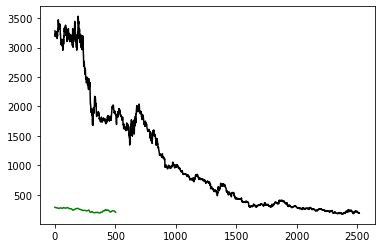

In [41]:
plt.plot(dataset,c='black')
plt.plot(predictions,c='green')
plt.show()

In [42]:
#Getting the root mean squared error(rmse)
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

11.303916445710502

In [43]:
x_test.shape

(503, 60, 1)

**TRAINING THE DATASET**

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [45]:
df_amazon.describe()

,Close/Last,Volume,Open,High,Low
count,2516.000000,2.516000e+03,2516.000000,2516.000000,2516.000000
mean,1063.464458,4.207630e+06,1063.903932,1074.999505,1051.288820
std,929.012084,2.295011e+06,930.056032,940.350978,917.969974
min,173.100000,8.813370e+05,169.620000,174.550000,166.970000
25%,306.772500,2.737498e+06,306.977500,310.787475,303.415500
50%,715.610000,3.615334e+06,715.610000,720.152500,711.240000
75%,1735.715000,4.936622e+06,1737.780000,1750.167500,1713.767500
max,3531.450000,2.412413e+07,3547.000000,3554.000000,3486.685000


In [46]:
x=df_amazon[['Open','High','Low','Volume']].values
y=df_amazon['Close/Last'].values

In [47]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.25,random_state=0)
regressor=LinearRegression()

In [48]:
regressor.fit(X_train,Y_train)

LinearRegression()

In [49]:
print(regressor.coef_)

[-6.05710981e-01  8.77825435e-01  7.26493229e-01 -1.60650940e-07]


In [50]:
print(regressor.intercept_)

1.1298422853697048


In [57]:
predicted=regressor.predict(X_test)
predicted1=regressor.predict(X_train)

In [62]:
score=regressor.score(X_test,Y_test)

In [63]:
print(score)

0.9998902057283632


In [64]:
predicted.shape

(629,)

In [65]:
Y_train.shape

(1887,)

In [66]:
predicted1.shape

(1887,)

In [67]:
X_train.shape

(1887, 4)

In [68]:
print(predicted)

[1424.35887394  723.40969343 1629.00050034  978.09350894  214.78868825
  992.46248674 1126.94083941  398.00388154  375.68818502  290.54728742
 2021.1247538   993.21436477 3107.57603474 1806.1842584  1781.30459272
 1927.53004222  336.95599018 1401.68080063  352.19068263  753.47012765
  891.80579462  326.69366126  263.08623848  678.94589693 1919.88737505
 1359.52217902 1913.79718248 1611.47762229  756.14983282  918.31304403
  996.83638339  239.28182335 3317.7238126   230.38232001  424.89033532
  947.01014783 1791.9380825   766.65780384 1998.40762445  774.85802353
 2170.00216445 1791.58988459  233.86622645  375.7956215   330.21864966
  204.72902912  426.5983711  2374.10301776 1101.23183339  386.9865908
  181.00073829  333.41538843  751.05834081  217.05268296  258.49498336
 1609.9779275  1103.65467591  259.5973356   355.08714579 1875.90240913
  203.7952157   784.2734878   234.42515175  962.59215193 2996.20793703
  357.77775594  256.05228783 1826.81788599  311.05409143  373.90437718
  309.3

In [69]:
dframe=pd.DataFrame({'Actual':Y_test.flatten(),'Predicted':predicted.flatten()})

In [70]:
actual=Y_test.flatten()
predicted=predicted.flatten()

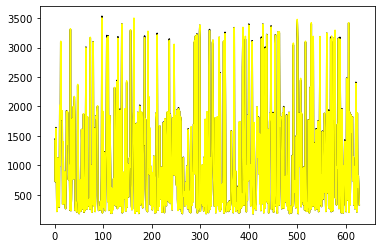

In [71]:
plt.plot(actual,c='black')
plt.plot(predicted,c='yellow')
plt.show()

In [72]:
dframe.head(25)

,Actual,Predicted
0,1442.840,1424.358874
1,719.440,723.409693
2,1641.090,1629.000500
3,979.470,978.093509
4,217.280,214.788688
5,989.580,992.462487
6,1126.310,1126.940839
7,398.790,398.003882
8,374.590,375.688185
9,286.950,290.547287


In [73]:
from sklearn import metrics

In [74]:
print('Mean Absolute Error:',metrics.mean_absolute_error(Y_test,predicted))
print("Mean Squared Error:",metrics.mean_squared_error(Y_test,predicted))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(Y_test,predicted)))

Mean Absolute Error: 5.056542377333381
Mean Squared Error: 93.64960142882653
Root Mean Squared Error: 9.677272416793201


In [75]:
  graph=dframe.head(20)

**GRAPH OF ACTUAL VS PREDICTED**

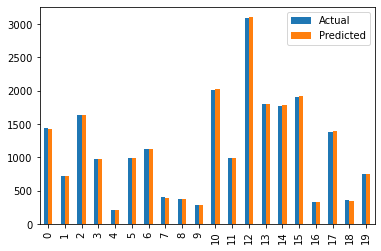

In [76]:
graph.plot(kind='bar')